# Explainability
One common concern when using machine learning is that it can be seen as a black box, where data goes in, and predictions come out, without having an idea on what features influenced the model in what way.

While machine learning will never be as explainable as using physical equations, there are techniques to explain some of the choices that are being made.

In [1]:
import shap
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from matplotlib import pyplot as plt

c:\Users\jmassant\AppData\Local\anaconda3\envs\machine_learning_tutorial\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('data/chl_regression_tutorial.csv')
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

features = ['rho_443_a', 'rho_492_a', 'rho_560_a', 'rho_665_a', 'rho_704_a', 'rho_740_a', 'rho_783_a', 'rho_865_a']
target = 'CHL'

X_train = df_train[features]
y_train = df_train[target]

X_test = df_test[features]
y_test = df_test[target]

model = joblib.load('models/regression_model.joblib')

## Feature importance

A simple way to gain insights in your model is by analyzing feature importances. There are many ways to determine this, but many models, such as LightGBM, have builtin methods for this.

In the figure created below, the features at the top have a bigger influence on the model decisions that the features at the bottom.

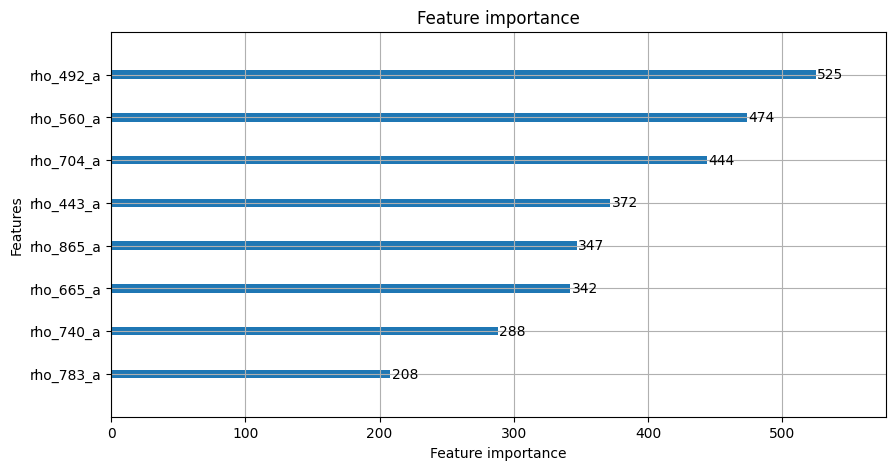

In [3]:
lgb.plot_importance(model, importance_type='auto', figsize=(10, 5))
plt.show()

## SHAP
Another powerful model-agnostic method to explain the decisions of machine learning models, is SHAP (SHapley Additive exPlanations), which is based on [this paper](https://arxiv.org/pdf/1705.07874).

There is a python package, names shap, that implements this, and has built-in techniques to generate plots to visualize the impact of features.

One example of getting a global overview of the impact of features in your model, is using a summary plot.

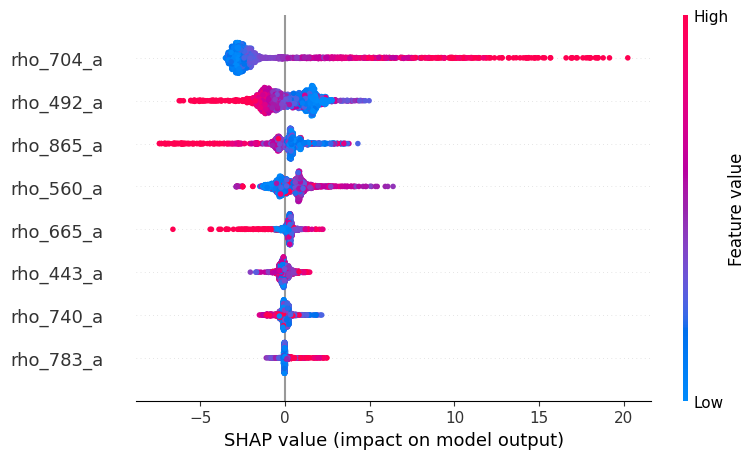

In [4]:
explainer = shap.Explainer(model)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)
plt.show()

In this plot, each dot represents a data sample. Blue values indicate a low feature value, red values indicate a high feature value. Dots to the left of the axis result in a lower prediction of CHL, dots on the right result in a higher prediction. For example, if there are many blue dots on the left and red dots on the right, it means that low feature values result in a lower prediction, and higher feature values result in a higher prediction, as seems to be the case for the reflectance of wavelength 704. Similarly, for wavelength 492, low values result in a low prediction and high values result in a high prediction.

Next to a global explainability overview, this can also be visualized for individual samples. Using a force plot for example, you can see how each feature impacted the output in what way.

In [5]:
shap.initjs()
shap.plots.force(shap_values[0])

A waterfall plot is another way to visualize this.

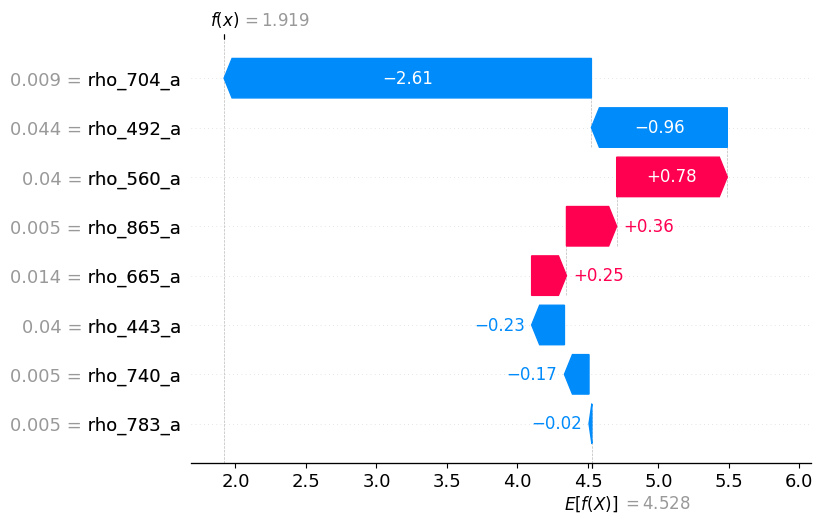

In [6]:
shap.plots.waterfall(shap_values[0])

Another type of plot is a dependence plot, where you can see how the shap value evolves with the feature value. Next to that, a second feature with the strongest interaction to the reference feature is shown using a colour, allowing analysis of the output values based on both features. 

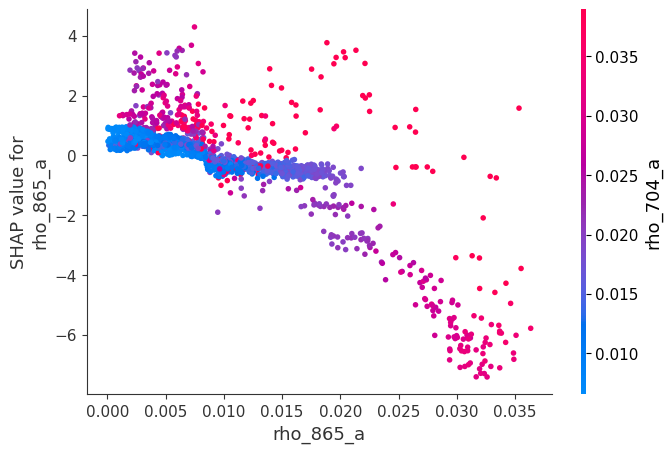

In [7]:
# shap dependence plot
shap.dependence_plot('rho_865_a', shap_values.values, X_test)